In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 300


In [4]:
carData = pd.read_table(r"C:\Users\owen\Desktop\RecallAnalysis\FLAT_CMPL\FLAT_CMPL.txt",error_bad_lines = False,  encoding = 'ISO-8859-1')


b'Skipping line 562494: expected 49 fields, saw 70\n'
b'Skipping line 1032227: expected 49 fields, saw 50\n'
b'Skipping line 1208326: expected 49 fields, saw 50\n'
b'Skipping line 1293115: expected 49 fields, saw 50\n'
b'Skipping line 1297984: expected 49 fields, saw 50\nSkipping line 1297985: expected 49 fields, saw 50\nSkipping line 1297986: expected 49 fields, saw 50\n'
b'Skipping line 1317854: expected 49 fields, saw 50\nSkipping line 1322763: expected 49 fields, saw 50\nSkipping line 1324669: expected 49 fields, saw 50\n'
b'Skipping line 1331347: expected 49 fields, saw 50\nSkipping line 1334670: expected 49 fields, saw 50\n'
C:\Users\owen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
analyzer = SentimentIntensityAnalyzer()


In [6]:
carData.keys()



Index(['1', '958170', 'Ford Motor Company', 'MERCURY', 'COUGAR', '1995',
       'Unnamed: 6', '19950101', 'N', '0', '0.1',
       'SERVICE BRAKES, HYDRAULIC:FOUNDATION COMPONENTS', 'CORRAL SPRIN', 'FL',
       '1MELM62W5SH', '19950103', '19950103.1', 'Unnamed: 17', '1.1',
       'BRAKING SYSTEM FAILURE WITHOUT ABS BRAKES.  TT', 'EVOQ', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'V', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')

In [189]:
test = analyzer.polarity_scores("s the shapeless, structureless baked alaska that droops and slumps and collapses while you eat it, or don’t eat it, supposed to be a representation in sugar and eggs of the experience of going insane?")
print(test)


{'neg': 0.136, 'compound': -0.5994, 'neu': 0.864, 'pos': 0.0}


In [263]:
frankenFrame = pd.DataFrame(columns = ['string', 'manufacturer', 'make', 'model', 'antilock', 'fire', 'injured', 'death', 'compound',])
#frankenFrame['ComplaintNum'] = carData['1'] # No longer kept track of in order to drop duplicates. 
frankenFrame['string'] = carData['BRAKING SYSTEM FAILURE WITHOUT ABS BRAKES.  TT']
frankenFrame['manufacturer'] = carData['Ford Motor Company']
frankenFrame['make'] = carData['MERCURY']
frankenFrame['model'] = carData['COUGAR']
frankenFrame['antilock'] = carData['Unnamed: 24']
frankenFrame['fire'] = carData['N']
frankenFrame['injured'] = carData['0']
frankenFrame['death'] = carData['0.1']
    #HARSH 1-2 SHIFT  SLIPPING 1-2 SHIFT FOLLOWED BY HARSH ENGAGEMENT.  *LA {'neu': 0.421, 'compound': -0.5473, 'pos': 0.196, 'neg': 0.382}

In [264]:
#cleaning repeated rows. 
frankenFrame = frankenFrame.drop_duplicates()



In [265]:
frankenFrame = frankenFrame[pd.notnull(frankenFrame['string'])]



In [ ]:
#vs = np.array()

count = 0

sent = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    vs = analyzer.polarity_scores(sentence)
    #print(vs)
    sent = sent.append( vs, ignore_index=True)
    #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    count += 1
    
    
    if count > 1000000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    

In [106]:
print(sent)


        compound    neg    neu    pos
0         0.0000  0.139  0.723  0.139
1         0.0000  0.000  1.000  0.000
2        -0.4019  0.442  0.354  0.204
3        -0.5473  0.124  0.876  0.000
4        -0.7650  0.248  0.752  0.000
5        -0.4215  0.318  0.682  0.000
6        -0.1531  0.078  0.922  0.000
7         0.0000  0.000  1.000  0.000
8        -0.4767  0.341  0.659  0.000
9         0.0000  0.000  1.000  0.000
10        0.0000  0.000  1.000  0.000
11       -0.5423  0.171  0.829  0.000
12       -0.5423  0.273  0.727  0.000
13       -0.3182  0.141  0.859  0.000
14        0.0000  0.000  1.000  0.000
15       -0.5106  0.292  0.708  0.000
16       -0.6249  0.359  0.476  0.165
17        0.0000  0.000  1.000  0.000
18       -0.4939  0.390  0.610  0.000
19       -0.0516  0.171  0.714  0.114
20       -0.4215  0.135  0.865  0.000
21       -0.2500  0.133  0.867  0.000
22       -0.4767  0.193  0.807  0.000
23       -0.7964  0.231  0.769  0.000
24        0.0000  0.000  1.000  0.000
25       -0.

In [104]:
frankenFrame['compound'] = sent['compound']

In [105]:
print(frankenFrame)

                                                    string  \
0        VEHICLE STALLS AT HIGH SPEED, RESULTING IN LOS...   
1        VEHICLES SUN ROOF GLASS FLEW OFF WHILE DRIVING...   
2        EXHAUST SYSTEM FAILS; PLEASE DESCRIBE DETAILS....   
4        WHEN REAR ENDED WITH FOOT ON BRAKE, DRIVERS SH...   
5        BRAKE PEDAL PUSH ROD RETAINER WAS NOT PROPERLY...   
7            STRESS CRACKS AROUND FRONT PLASTIC HINGE.  TT   
8        DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN ...   
9        DURING BRAKE APPLICATION VEHICLE EXHIBITS A GR...   
10           THROTTLE STICKS WHICH CAUSED AN ACCIDENT.  TT   
11       DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL C...   
12       REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERA...   
13       THE STRUT WAS BAD THERE IS A NOISE ON THE PASS...   
14       REPLACED TRANSMISSION DUE TO INTERNAL FLUID LE...   
15       ERRATIC OPERATION OF ELECTRONIC GAS GAUGE. UPO...   
16       AUTOMATIC DOOR LOCKS WHEN USED, WILL NOT RELEA...   
17      

In [107]:
frankenFrame.describe() 

C:\Users\owen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,injured,death,compound
count,497509.000000,486487.000000,88631.000000
mean,0.139053,0.009671,-0.289831
std,0.801169,0.453309,0.328977
min,0.000000,0.000000,-0.990700
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,99.000000,99.000000,0.941800


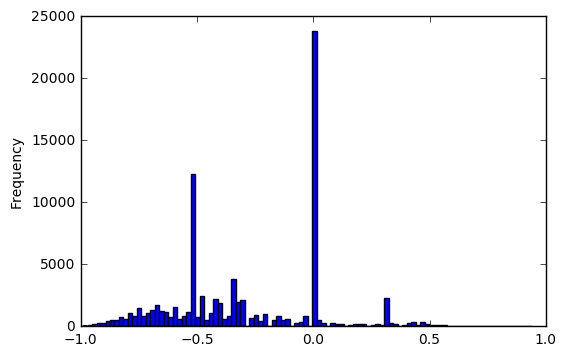

In [138]:
frankenFrame['compound'].plot.hist(stacked = True, bins = 100)

plt.show()

In [130]:
sortFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [133]:
sortFrame.reset_index(drop=True, inplace=True)

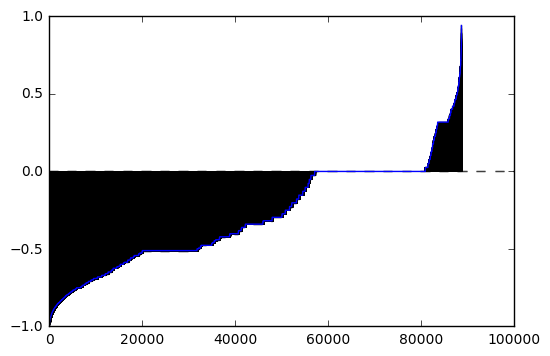

In [140]:
sortFrame['compound'].plot()
plt.axis([0, 100000, -1.0, 1.0])
plt.show()

In [ ]:
checkManu = frankenFrame.groupby('model', as_index = False)['death'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [176]:
print(frankenFrame)

                                                                                                                                                                                                                                                                                                              string  \
0                                                                                                                                                                                                                               VEHICLE STALLS AT HIGH SPEED, RESULTING IN LOSS OF STEERING AND BRAKING ABILITY.  TT   
1                                                                                                                                                                                                                                                                VEHICLES SUN ROOF GLASS FLEW OFF WHILE DRIVING.  TT   
2                                                               

In [190]:
checkManu = checkManu.sort_values(by = 'compound', ascending=[True])

KeyError: 'fire'

In [182]:
checkManu.reset_index(drop=True, inplace=True)
checkManu.dropna(how='any')

,manufacturer,compound
7,LAND ROVER,-0.690500
9,Toyota Motor Corporation,-0.660300
11,NEWMAR CORPORATION,-0.639167
19,BELL MFG. CORPORATION,-0.510600
27,PIRELLI TIRE LLC,-0.510600
30,GROUP LOTUS PLC,-0.496800
31,SEARS ROEBUCK & CO.,-0.489080
33,FEDERA-MOGUL CORPORATION,-0.476700
34,FIRESTONE TIRE & RUBBER CO.,-0.471200
35,"CARRIAGE, INC",-0.462050


In [234]:
frankenFrame.keys()

Index(['string', 'manufacturer', 'make', 'model', 'antilock', 'fire',
       'injured', 'death', 'compound'],
      dtype='object')

In [259]:
checkManu = frankenFrame.groupby('make', as_index = False)['compound'].mean()
manuCounts = frankenFrame['make'].value_counts()
remove = manuCounts[manuCounts <= 20].index #if there are less than 20 items, drop them. 
checkManu['make'].replace(remove, np.nan, inplace = True) 

In [260]:
checkManu = checkManu.sort_values(by = 'compound', ascending=[True])

In [261]:
checkManu = checkManu.dropna(how='any')

In [262]:
print(checkManu)

                      make  compound
1332                SAFARI -0.630600
1075            MOTO GUZZI -0.624900
1172            PATHFINDER -0.510600
214                   BELL -0.510600
1286                RIALTA -0.505400
964                  LOTUS -0.496800
1351                 SEARS -0.489080
315               CARRIAGE -0.462050
262                BOUNDER -0.456250
397                 COOPER -0.442400
1365                SHASTA -0.424050
191           B.F.GOODRICH -0.423920
278                 BRITAX -0.422050
1673          WESTERN STAR -0.421500
671         GENERAL MOTORS -0.421500
670         GENERAL ENGINE -0.416900
925             LAND ROVER -0.405658
1111                NEWMAR -0.399825
1575               TRIUMPH -0.397000
99              AM GENERAL -0.376592
246              BLUE BIRD -0.375952
971                   MACK -0.370782
1383               SKYLINE -0.369240
313              CARPENTER -0.352822
285                  BUELL -0.347333
1600              UNIROYAL -0.345691
1

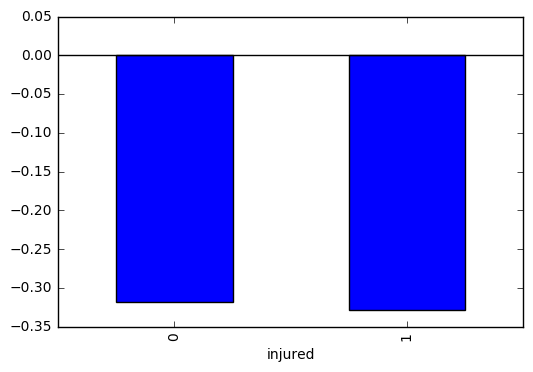

In [246]:
checkManu['compound'].plot.bar()
plt.axhline(0, color='k')
plt.xlabel('make')
plt.show()

In [27]:
print (frankenFrame[5])

0.081


In [11]:
import operator


In [13]:
sortVs = sorted(vs.items(), key=operator.itemgetter(0))

In [14]:
print(sortVs)

[('compound', -0.6575), ('neg', 0.088), ('neu', 0.831), ('pos', 0.081)]


In [3]:
carData['Ford Motor Company'].value_counts()

General Motors LLC                       152829
GENERAL MOTORS CORP.                     138021
Ford Motor Company                       137322
FORD MOTOR COMPANY                       131559
DAIMLERCHRYSLER CORPORATION               78895
CHRYSLER GROUP LLC                        75396
TOYOTA MOTOR CORPORATION                  61899
Chrysler (FCA US LLC)                     60378
HONDA (AMERICAN HONDA MOTOR CO.)          41848
NISSAN NORTH AMERICA, INC.                34411
Chrysler Group LLC                        31162
Toyota Motor Corporation                  27996
Nissan North America, Inc.                27210
Honda (American Honda Motor Co.)          25102
GENERAL MOTORS LLC                        19793
VOLKSWAGEN OF AMERICA, INC                16801
MAZDA MOTOR CORP                          12946
BMW of North America, LLC                 12505
UNKNOWN MANUFACTURER                      11524
Volkswagen of America, Inc.                9760
MITSUBISHI MOTORS NORTH AMERICA, INC.   